In [1]:
# Using the exported model

import pickle
import pandas as pd

In [2]:
df = pd.read_csv('checkout_data.csv')
df.head()

,Datetime,Count
0,26-09-2014 00:00,NaN
1,26-09-2014 01:00,NaN
2,26-09-2014 02:00,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  3 non-null      object 
 1   Count     0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes


In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  3 non-null      datetime64[ns]
 1   Count     0 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 180.0 bytes


In [15]:
df.index = df['Datetime']
df['ds'] = df.index
df

,Datetime,Count,ds
Datetime,,,
2014-09-26 00:00:00,2014-09-26 00:00:00,NaN,2014-09-26 00:00:00
2014-09-26 01:00:00,2014-09-26 01:00:00,NaN,2014-09-26 01:00:00
2014-09-26 02:00:00,2014-09-26 02:00:00,NaN,2014-09-26 02:00:00


In [16]:
df.head()

,Datetime,Count,ds
Datetime,,,
2014-09-26 00:00:00,2014-09-26 00:00:00,NaN,2014-09-26 00:00:00
2014-09-26 01:00:00,2014-09-26 01:00:00,NaN,2014-09-26 01:00:00
2014-09-26 02:00:00,2014-09-26 02:00:00,NaN,2014-09-26 02:00:00


In [26]:
loaded_model = pickle.load(open('time_series_forecast_model', 'rb'))

loaded_model

In [32]:
future = loaded_model.make_future_dataframe(periods=500)

future = future[:,1200:1061]

future

InvalidIndexError: (slice(None, None, None), slice(1200, 1061, None))

In [ ]:
forecast = loaded_model.predict(future)

forecast

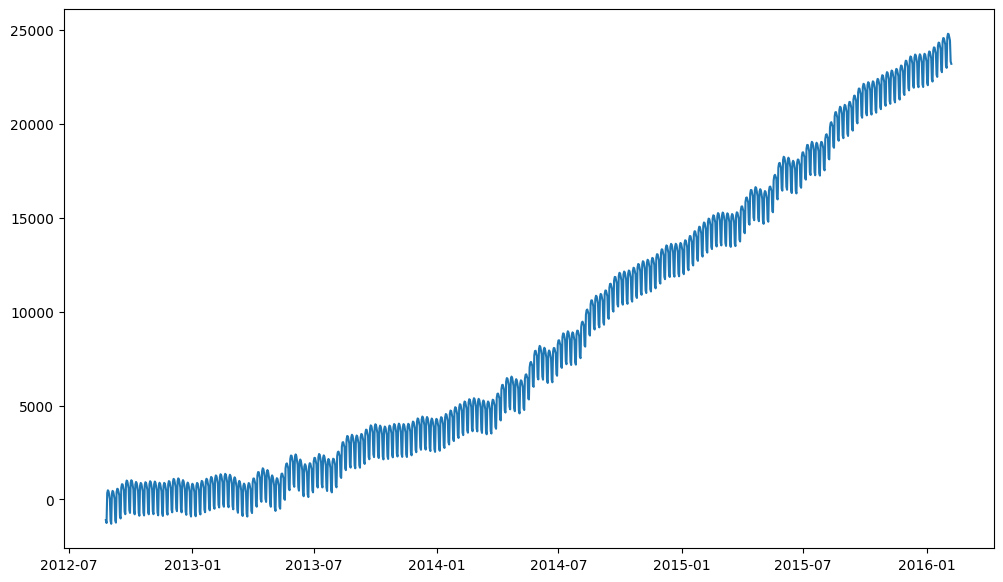

In [25]:
# forecast data
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()